In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2,
                  random_state=23)

In [3]:
X

array([[-5.37039106,  3.47555168],
       [ 5.84161203, -3.98182959],
       [ 1.76127766,  9.39696306],
       ...,
       [ 6.14147823, -5.75491603],
       [-5.45330839,  1.75599573],
       [-0.21966953,  8.72922042]])

In [4]:
y

array([2, 1, 0, 2, 1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 1, 2, 1, 0, 1, 2, 2, 1, 0, 1, 1, 2,
       2, 1, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1,
       0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1,
       0, 0, 2, 1, 1, 2, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2,
       0, 0, 2, 1, 1, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0,
       2, 2, 2, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 1,
       1, 2, 0, 2, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 0, 0,
       1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 0,
       0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 2, 1, 1, 1,

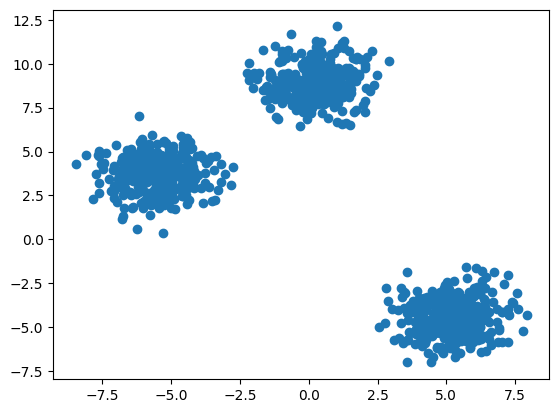

In [5]:
plt.scatter(X[:,0],X[:,1])

In [6]:
from sklearn.model_selection import train_test_split


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

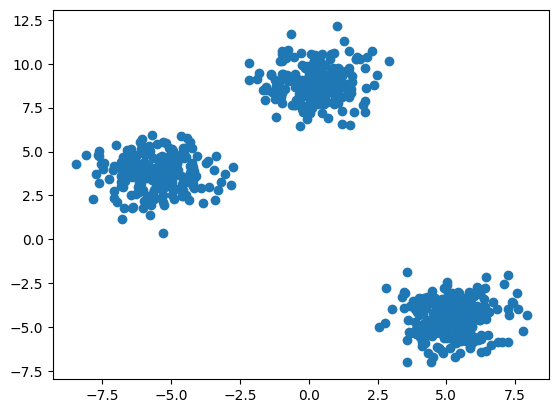

In [8]:
plt.scatter(X_train[:,0],X_train[:,1])

In [9]:
from sklearn.cluster import KMeans

In [10]:
## for K value
## elbow method

In [11]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)## inertia will give us the value of wcss

In [12]:
wcss

[34827.57682552021,
 7935.4372861454185,
 1319.2730531585605,
 1172.4408969783597,
 991.8238694516631,
 910.7328078402909,
 765.748344687723,
 684.4878568258267,
 646.1663735365296,
 612.1835275771227]

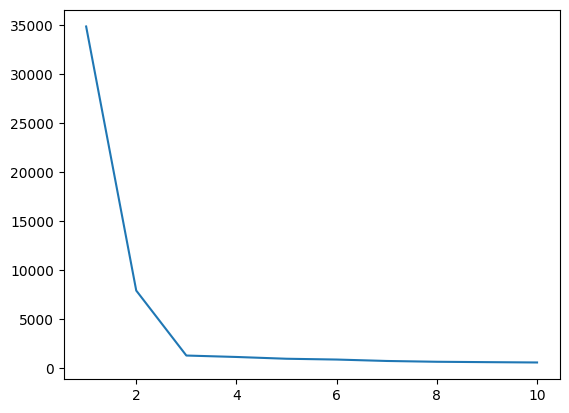

In [13]:
plt.plot(range(1,11),wcss)

In [14]:
## from above elbow diagram we can say that k=3 after which line become almost constant

In [15]:
kmeans=KMeans(n_clusters=3)

In [16]:
y_lab=kmeans.fit_predict(X_train)## fit_predict is done for training data set

In [17]:
y_test_lab=kmeans.predict(X_test)

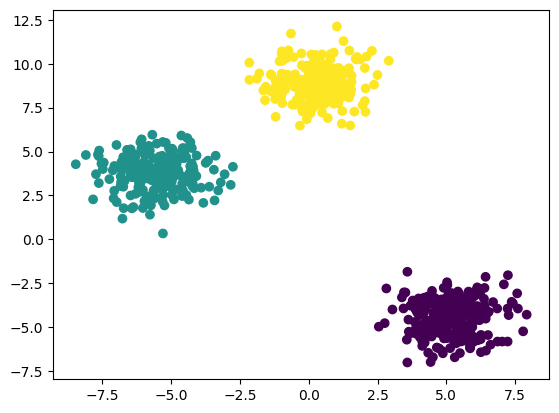

In [18]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_lab)

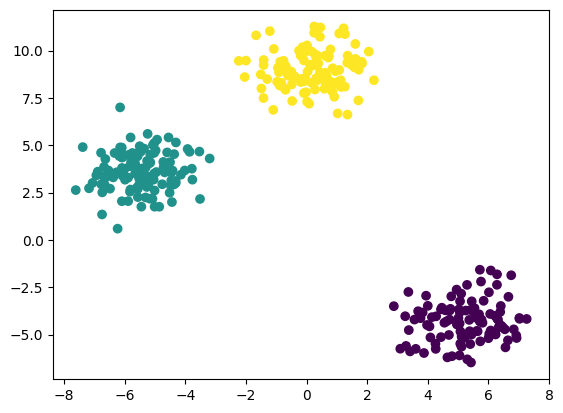

In [19]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_lab)

In [20]:
## we can automate the elbow method 
!pip install kneed

In [21]:
from kneed import KneeLocator

In [22]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [24]:
print(kl.elbow)

3


In [27]:
from sklearn.metrics import silhouette_score

In [29]:
sil_coef=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    sil_coef.append(score)

In [30]:
sil_coef

[np.float64(0.7281443868598331),
 np.float64(0.8071181203797672),
 np.float64(0.6064049889954577),
 np.float64(0.5036586732274294),
 np.float64(0.3255090528368545),
 np.float64(0.3383936534393026),
 np.float64(0.3318476305568713),
 np.float64(0.32063757197879167),
 np.float64(0.33316718895745134)]

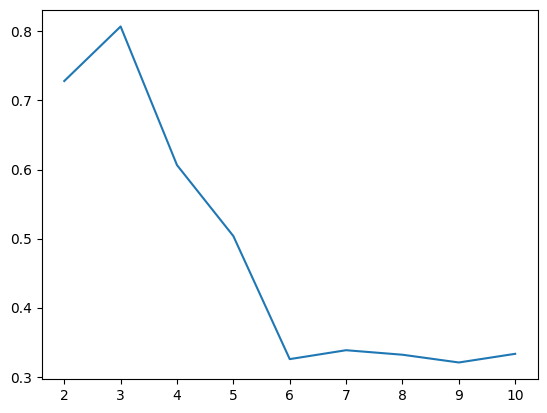

In [31]:
plt.plot(range(2,11),sil_coef)

In [32]:
## at k=3 value of silhouttee score is highest